In [29]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/preprocessed_dataset.csv')
data

,longitude,latitude,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,8.3252,452600.0,NEAR BAY,2
1,-122.22,37.86,8.3014,358500.0,NEAR BAY,2
2,-122.26,37.84,2.0804,226700.0,NEAR BAY,2
3,-122.26,37.85,2.1250,140000.0,NEAR BAY,2
4,-122.26,37.84,1.9911,158700.0,NEAR BAY,2
...,...,...,...,...,...,...
18374,-121.09,39.48,1.5603,78100.0,INLAND,4
18375,-121.21,39.49,2.5568,77100.0,INLAND,4
18376,-121.22,39.43,1.7000,92300.0,INLAND,4
18377,-121.32,39.43,1.8672,84700.0,INLAND,4


In [26]:
training_error_SVR = []



In [ ]:
model = SVR(kernel='poly')
for i in range(1,2):
    # Step 1: First split (Train: 60%, Temp: 40%)
    train_set, temp_set = train_test_split(data, test_size=0.4, random_state=42+i)

    X_train = train_set[["longitude","latitude"]]
    y_train = train_set["median_house_value"]

    param_space = {'C': range(1, 20)}

    Grid_search = GridSearchCV(model, param_space, cv=5)
    Grid_search.fit(X_train,y_train)

    # Parameter which gives the best results
    print(f"Best Hyperparameters: {Grid_search.best_params_}")

    # Accuracy of the model after using best parameters
    training_error_SVR.append(Grid_search.best_score_)
    x_pred = Grid_search.predict(X_train) 
  
    # plot the predicted values against the true values 
    plt.scatter(X_train, y_train, color='darkorange', 
                label='data') 
    plt.plot(x_pred, y_train, color='cornflowerblue', 
            label='prediction') 
    plt.legend() 
    plt.show() 



KeyboardInterrupt: 

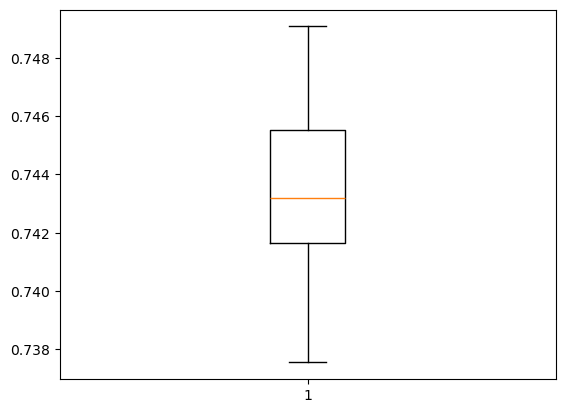

In [ ]:


plt.boxplot(training_error_SVM);